In [4]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [5]:

import pandas as pd

df=pd.read_csv("/Users/myspecialonebrigitta/Desktop/HS_load_2025.csv")
df["timestamp"] = pd.to_datetime(df["timestamp"])
df["date"] = df["timestamp"].dt.date
df["time"] = df["timestamp"].dt.time


In [6]:
pivot_df = df.pivot(index="date", columns="time", values="load")
pivot_df = pivot_df.dropna()

In [7]:

features_df = pd.DataFrame(index=pivot_df.index)

# total load（kWh）
features_df["total_load"] = pivot_df.sum(axis=1)

# peak&valley
features_df["peak_load"] = pivot_df.max(axis=1)
features_df["valley_load"] = pivot_df.min(axis=1)
features_df["load_range"] = features_df["peak_load"] - features_df["valley_load"]

# 
features_df["load_std"] = pivot_df.std(axis=1)
features_df["time_of_peak"] = pivot_df.idxmax(axis=1).astype(str)
features_df["time_of_valley"] = pivot_df.idxmin(axis=1).astype(str)

In [8]:
morning_cols = [col for col in pivot_df.columns if col < pd.to_datetime("12:00:00").time()]
afternoon_cols = [col for col in pivot_df.columns if col >= pd.to_datetime("12:00:00").time()]

features_df["morning_load"] = pivot_df[morning_cols].sum(axis=1)
features_df["afternoon_load"] = pivot_df[afternoon_cols].sum(axis=1)

In [9]:
features_df.index = pd.to_datetime(features_df.index)
features_df["day_of_week"] = features_df.index.dayofweek  # 0=Monday
features_df["is_weekend"] = features_df["day_of_week"] >= 5

In [10]:
features_df.head()  

,total_load,peak_load,valley_load,load_range,load_std,time_of_peak,time_of_valley,morning_load,afternoon_load,day_of_week,is_weekend
date,,,,,,,,,,,
2025-01-01,16436.88,353.36,53.36,300.00,106.999661,07:30:00,22:15:00,8889.60,7547.28,2,False
2025-01-02,16381.60,441.04,52.96,388.08,118.287983,08:15:00,03:00:00,9117.04,7264.56,3,False
2025-01-03,19059.04,512.48,54.96,457.52,147.852123,08:00:00,00:00:00,10989.12,8069.92,4,False
2025-01-04,8653.84,118.64,64.24,54.40,14.504183,07:30:00,16:00:00,4587.04,4066.80,5,True
2025-01-05,15180.80,323.36,98.56,224.80,58.853618,06:30:00,00:00:00,8985.52,6195.28,6,True


In [11]:
features_df.to_csv("virginia_features.csv") 

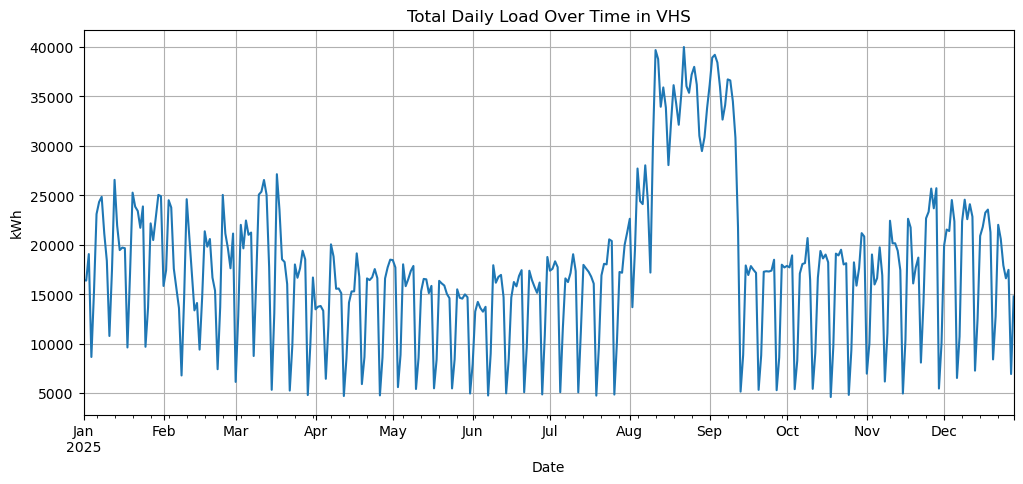

In [12]:
import matplotlib.pyplot as plt

features_df["total_load"].plot(figsize=(12, 5), title="Total Daily Load Over Time in VHS")
plt.xlabel("Date")
plt.ylabel("kWh")
plt.grid(True)
plt.show()


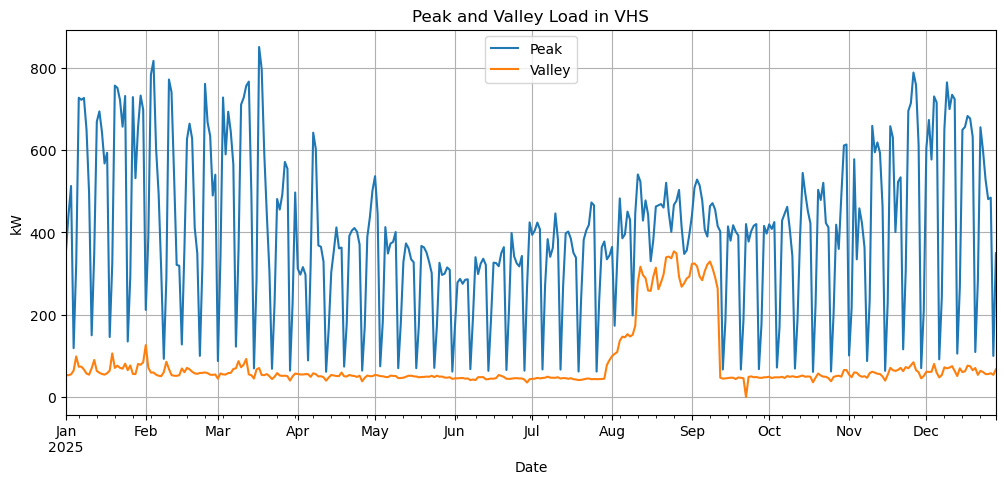

In [13]:
features_df[["peak_load", "valley_load"]].plot(figsize=(12, 5), title="Peak and Valley Load in VHS")
plt.xlabel("Date")
plt.ylabel("kW")
plt.legend(["Peak", "Valley"])
plt.grid(True)
plt.show()


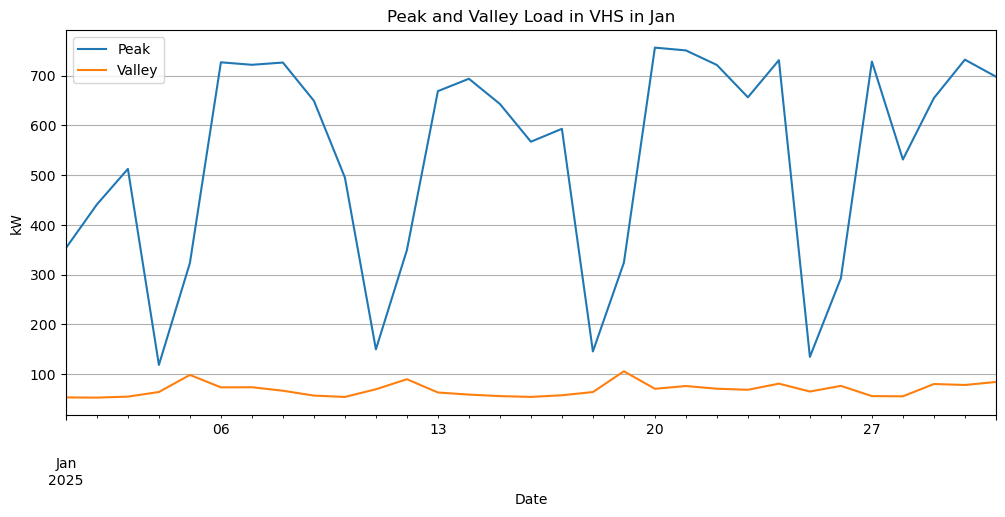

In [14]:
jan_df = features_df[features_df.index.month == 1]
jan_df[["peak_load", "valley_load"]].plot(figsize=(12, 5), title="Peak and Valley Load in VHS in Jan")
plt.xlabel("Date")
plt.ylabel("kW")
plt.legend(["Peak", "Valley"])
plt.grid(True)
plt.show()

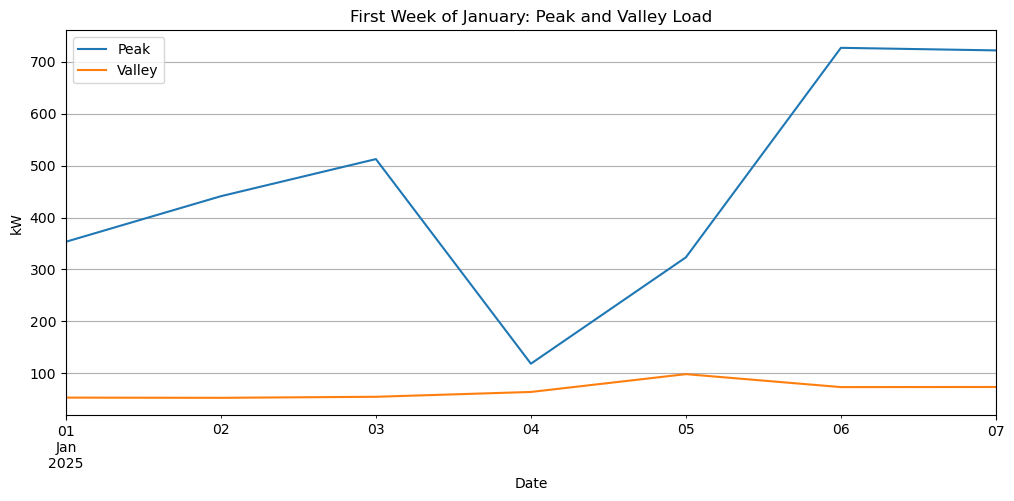

In [15]:
# Filter for the first week of January (Jan 1–7, inclusive)
first_week = features_df.loc[(features_df.index.month == 1) & (features_df.index.day <= 7)]

# Plot
first_week[["peak_load", "valley_load"]].plot(figsize=(12, 5), title="First Week of January: Peak and Valley Load")
plt.xlabel("Date")
plt.ylabel("kW")
plt.legend(["Peak", "Valley"])
plt.grid(True)
plt.show()


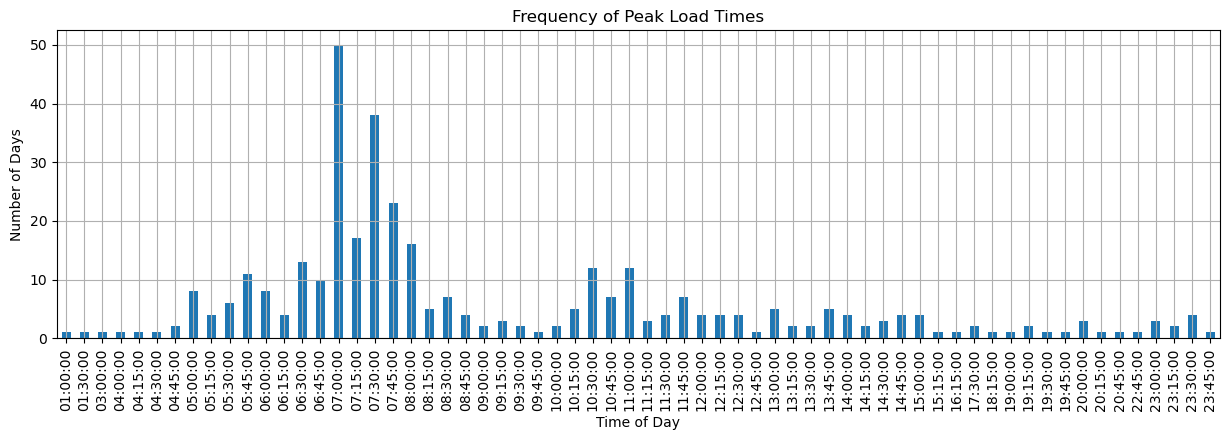

In [16]:
# Plot histogram of time_of_peak
features_df["time_of_peak"].value_counts().sort_index().plot(kind="bar", figsize=(15, 4), title="Frequency of Peak Load Times")
plt.xlabel("Time of Day")
plt.ylabel("Number of Days")
plt.xticks(rotation=90)
plt.grid(True)
plt.show()


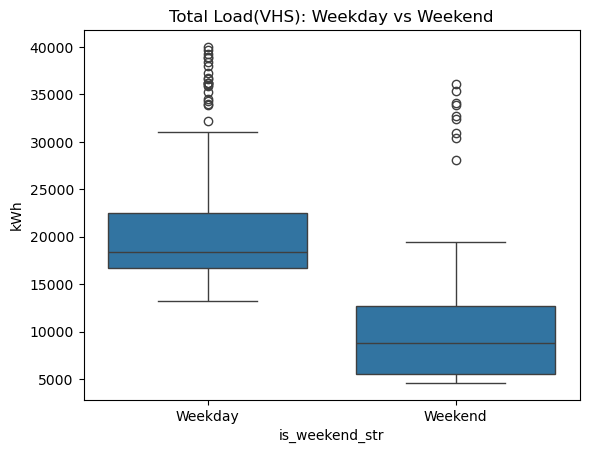

In [17]:

features_df["is_weekend_str"] = features_df["is_weekend"].map({True: "Weekend", False: "Weekday"})
sns.boxplot(x="is_weekend_str", y="total_load", data=features_df)
plt.title("Total Load(VHS): Weekday vs Weekend")
plt.ylabel("kWh")
plt.show()


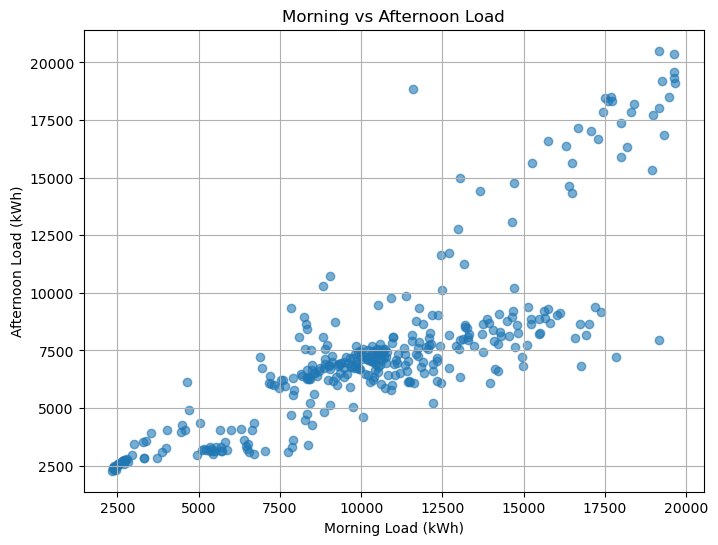

In [18]:
plt.figure(figsize=(8, 6))
plt.scatter(features_df["morning_load"], features_df["afternoon_load"], alpha=0.6)
plt.xlabel("Morning Load (kWh)")
plt.ylabel("Afternoon Load (kWh)")
plt.title("Morning vs Afternoon Load")
plt.grid(True)
plt.show()


In [19]:

# Ensure time columns are strings
pivot_df.columns = [str(col) for col in pivot_df.columns]

# Initialize feature dataframe
feature_df = pd.DataFrame(index=pivot_df.index)

# Basic statistics
feature_df['peak_load'] = pivot_df.max(axis=1)
feature_df['valley_load'] = pivot_df.min(axis=1)
feature_df['load_range'] = feature_df['peak_load'] - feature_df['valley_load']
feature_df['mean_load'] = pivot_df.mean(axis=1)
feature_df['std_load'] = pivot_df.std(axis=1)
feature_df['load_factor'] = feature_df['mean_load'] / feature_df['peak_load']

# Times of peak and valley
feature_df['peak_time'] = pivot_df.idxmax(axis=1)
feature_df['valley_time'] = pivot_df.idxmin(axis=1)

# Time ranges (adjust as needed to match your time labels)
morning_hours = [col for col in pivot_df.columns if '06:' <= col <= '11:']
afternoon_hours = [col for col in pivot_df.columns if '12:' <= col <= '17:']
night_hours = [col for col in pivot_df.columns if '18:' <= col <= '23:']

# Compute averages for each time window
feature_df['morning_mean'] = pivot_df[morning_hours].mean(axis=1)
feature_df['afternoon_mean'] = pivot_df[afternoon_hours].mean(axis=1)
feature_df['night_mean'] = pivot_df[night_hours].mean(axis=1)

# Save the new feature dataframe for further use
feature_df.to_csv("data_center_features.csv")

# Optional: display a few rows
feature_df.head()

,peak_load,valley_load,load_range,mean_load,std_load,load_factor,peak_time,valley_time,morning_mean,afternoon_mean,night_mean
date,,,,,,,,,,,
2025-01-01,353.36,53.36,300.00,171.217500,106.999661,0.484541,07:30:00,22:15:00,291.416,256.484,88.620
2025-01-02,441.04,52.96,388.08,170.641667,118.287983,0.386907,08:15:00,03:00:00,322.252,243.588,87.012
2025-01-03,512.48,54.96,457.52,198.531667,147.852123,0.387394,08:00:00,00:00:00,401.524,283.040,86.632
2025-01-04,118.64,64.24,54.40,90.144167,14.504183,0.759813,07:30:00,16:00:00,109.008,74.472,92.536
2025-01-05,323.36,98.56,224.80,158.133333,58.853618,0.489032,06:30:00,00:00:00,258.956,135.592,125.632


In [20]:

pivot_df.columns = [str(col) for col in pivot_df.columns]  # Ensure all columns are string-type time labels

# -------- Step 2: Compute features --------
feature_df = pd.DataFrame(index=pivot_df.index)

feature_df['peak_load'] = pivot_df.max(axis=1)
feature_df['valley_load'] = pivot_df.min(axis=1)
feature_df['load_range'] = feature_df['peak_load'] - feature_df['valley_load']
feature_df['mean_load'] = pivot_df.mean(axis=1)
feature_df['std_load'] = pivot_df.std(axis=1)
feature_df['load_factor'] = feature_df['mean_load'] / feature_df['peak_load']
feature_df['peak_time'] = pivot_df.idxmax(axis=1)
feature_df['valley_time'] = pivot_df.idxmin(axis=1)

# Time periods
morning = [col for col in pivot_df.columns if '06:' <= col <= '11:']
afternoon = [col for col in pivot_df.columns if '12:' <= col <= '17:']
night = [col for col in pivot_df.columns if '18:' <= col <= '23:']

feature_df['morning_mean'] = pivot_df[morning].mean(axis=1)
feature_df['afternoon_mean'] = pivot_df[afternoon].mean(axis=1)
feature_df['night_mean'] = pivot_df[night].mean(axis=1)

# Save
feature_df.to_csv("data_center_features.csv")




<Figure size 1600x1000 with 0 Axes>

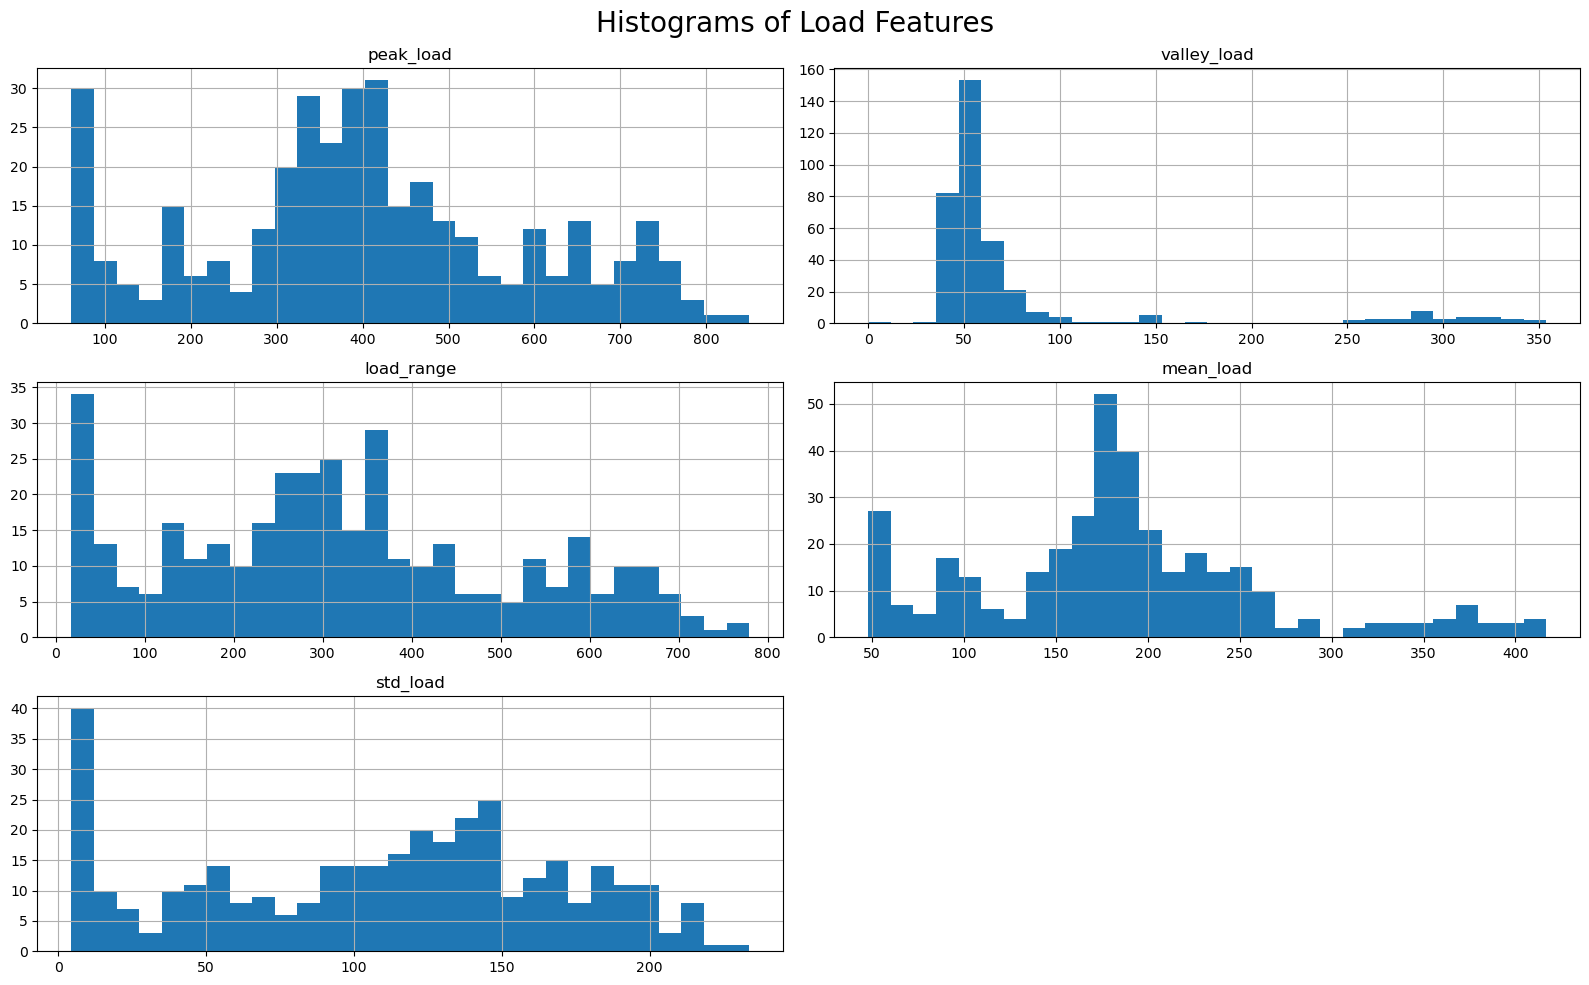

In [21]:
# -------- Step 3: Visualize distributions --------
plt.figure(figsize=(16, 10))
feature_df[['peak_load', 'valley_load', 'load_range', 'mean_load', 'std_load']].hist(bins=30, figsize=(16, 10))
plt.suptitle("Histograms of Load Features", fontsize=20)
plt.tight_layout()
plt.show()



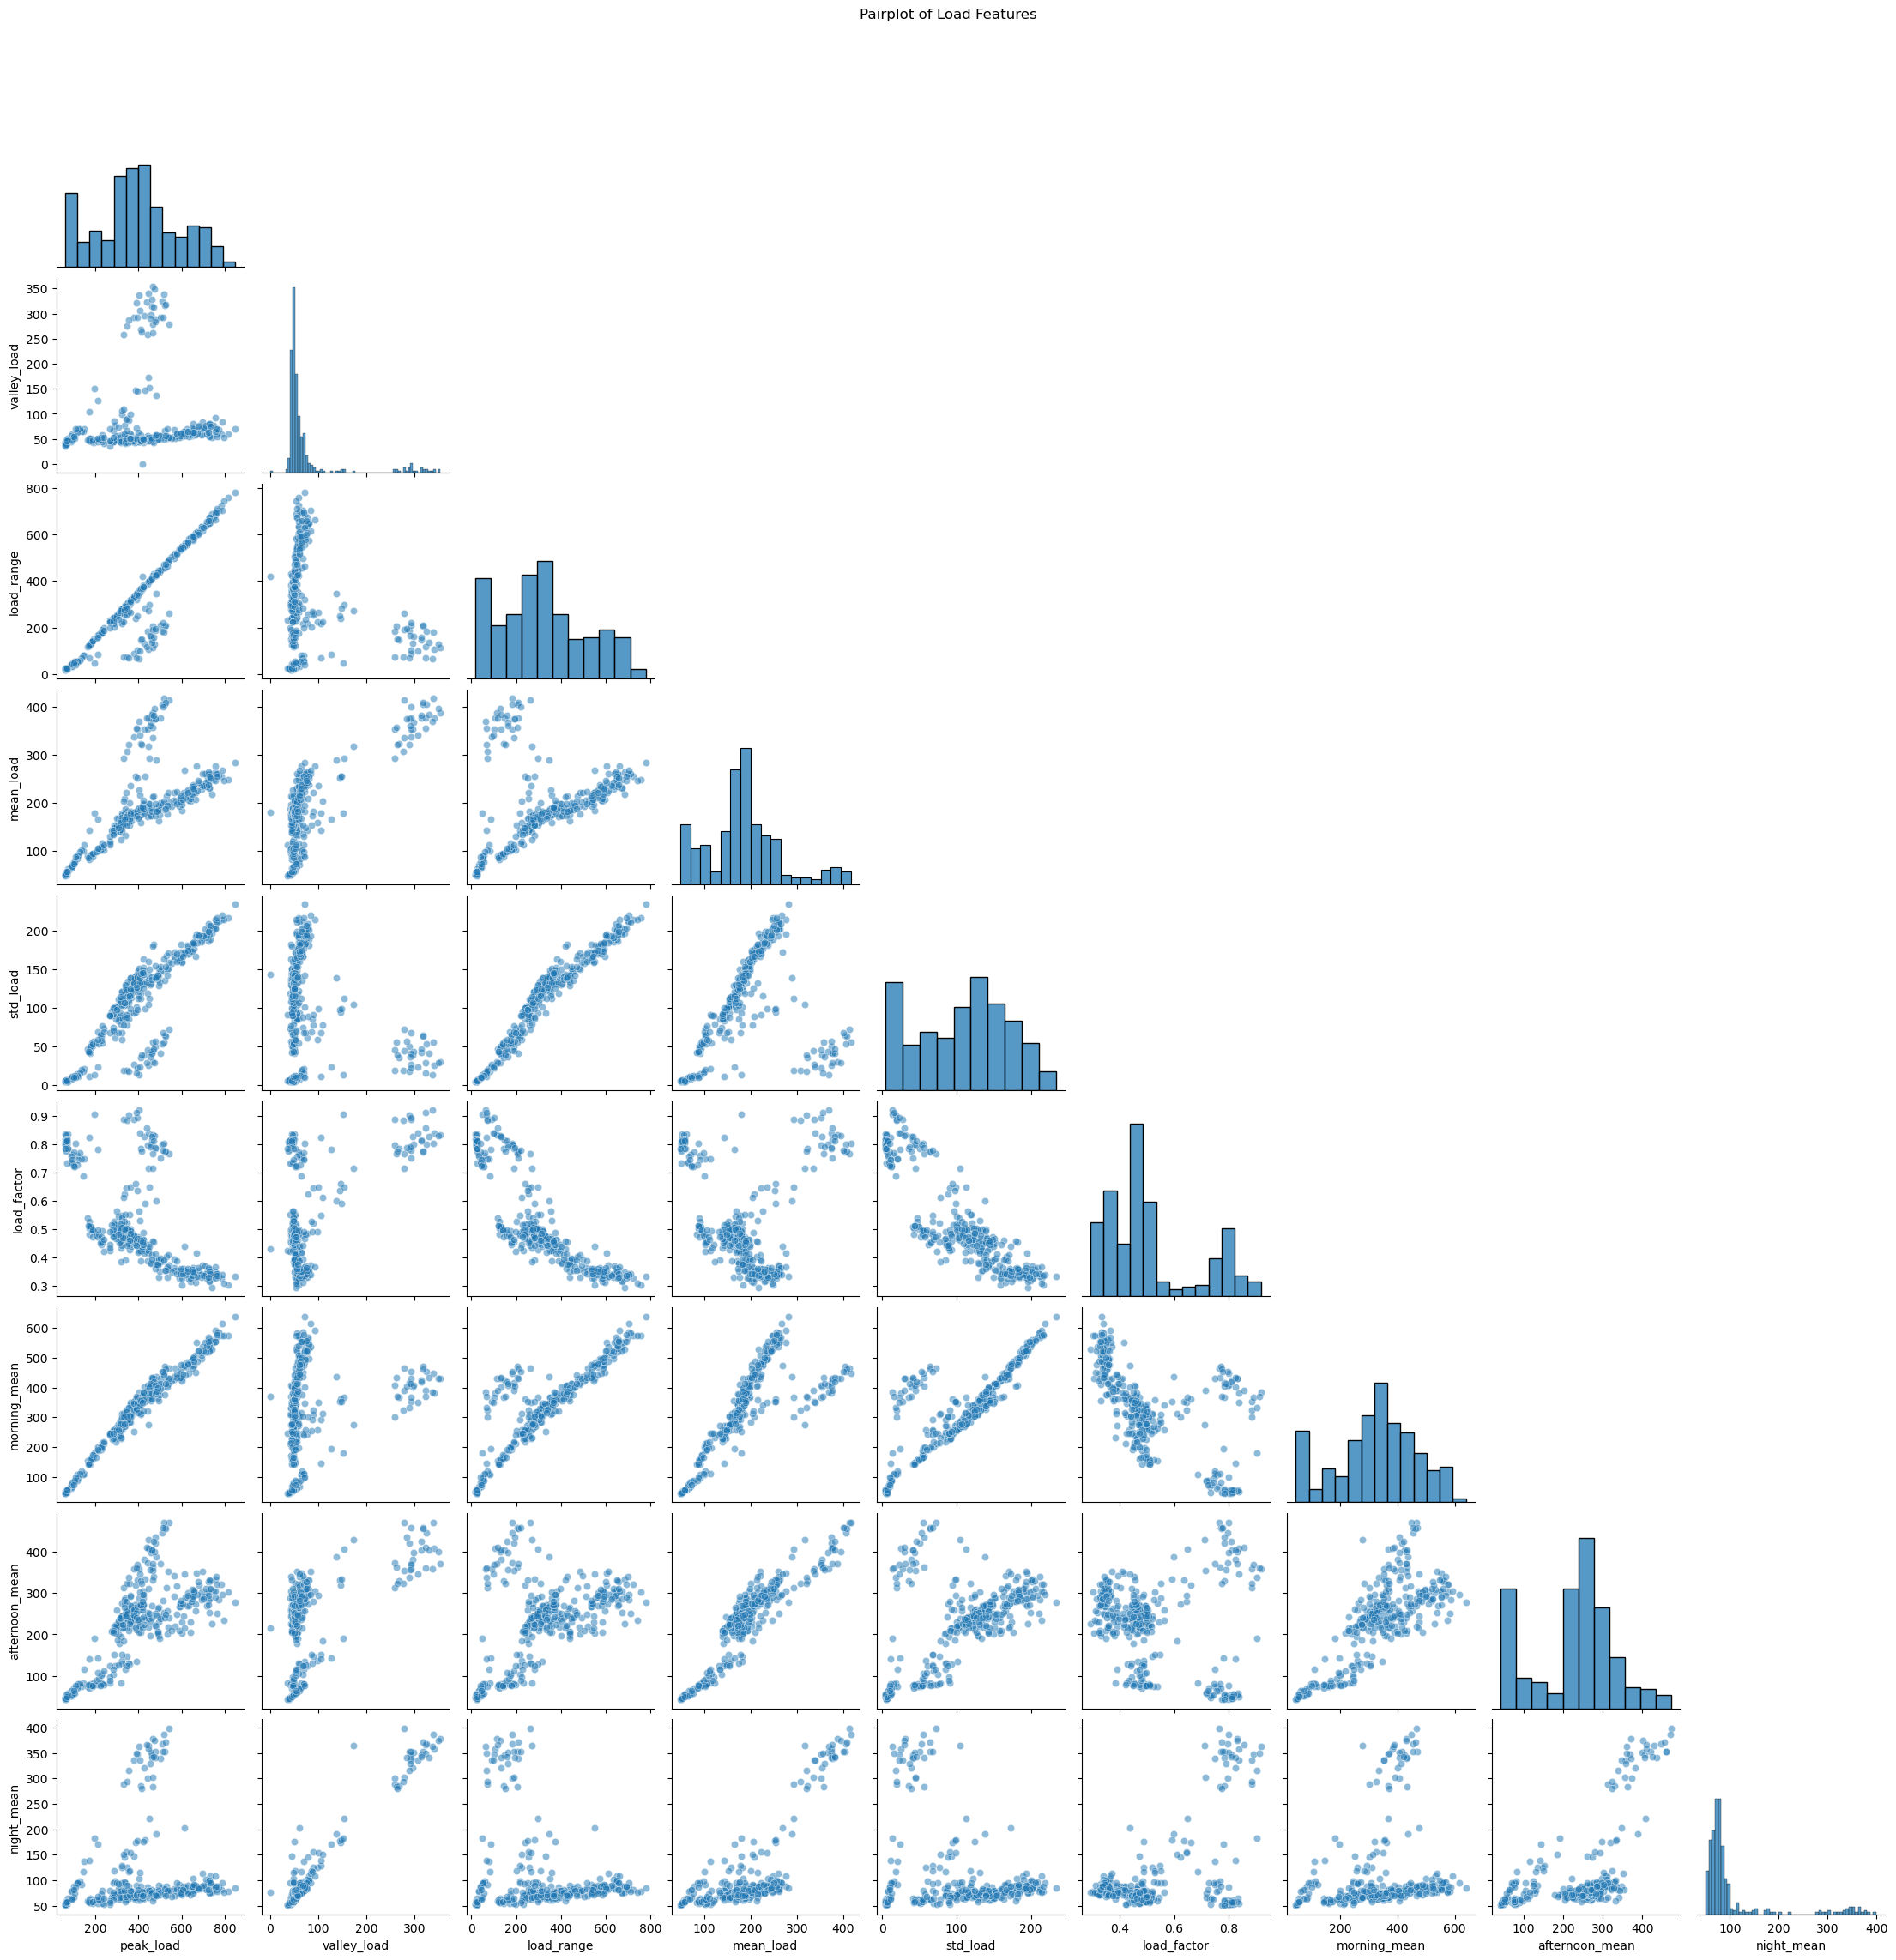

In [22]:
# -------- Step 4: Pairplot (scatter matrix) --------
# Drop non-numeric columns like time labels for plotting
numeric_features = feature_df.drop(columns=['peak_time', 'valley_time'])

sns.pairplot(numeric_features, corner=True, plot_kws={'alpha': 0.5})
plt.suptitle("Pairplot of Load Features", y=1.02)
plt.show()

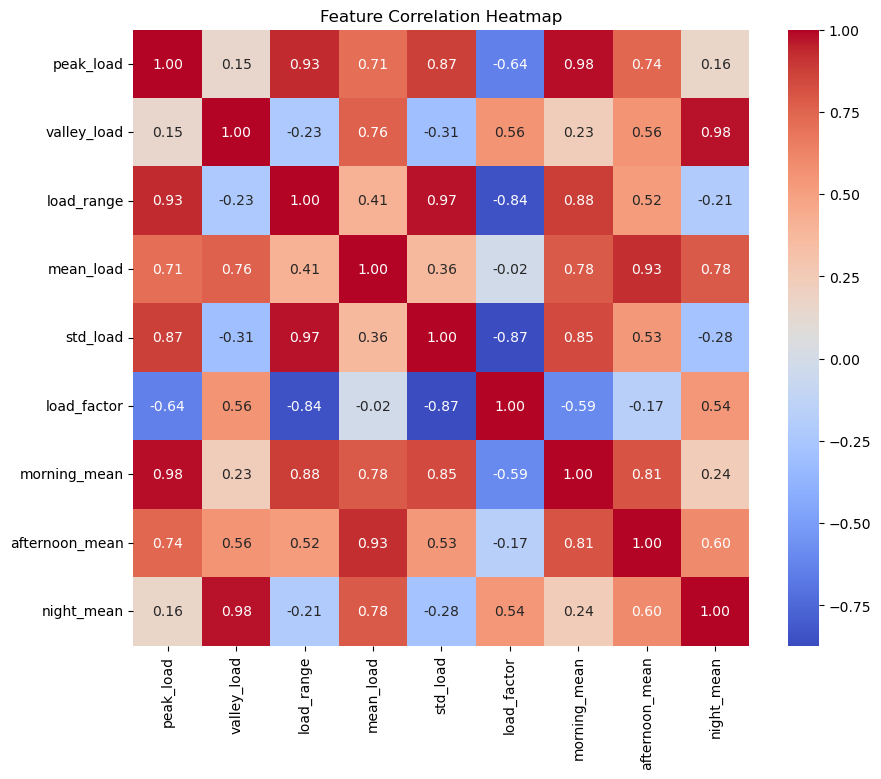

In [23]:
import seaborn as sns
import matplotlib.pyplot as plt

# Drop non-numeric columns first
corr_df = feature_df.drop(columns=['peak_time', 'valley_time'])

plt.figure(figsize=(10, 8))
sns.heatmap(corr_df.corr(), annot=True, fmt=".2f", cmap='coolwarm', square=True)
plt.title("Feature Correlation Heatmap")
plt.show()


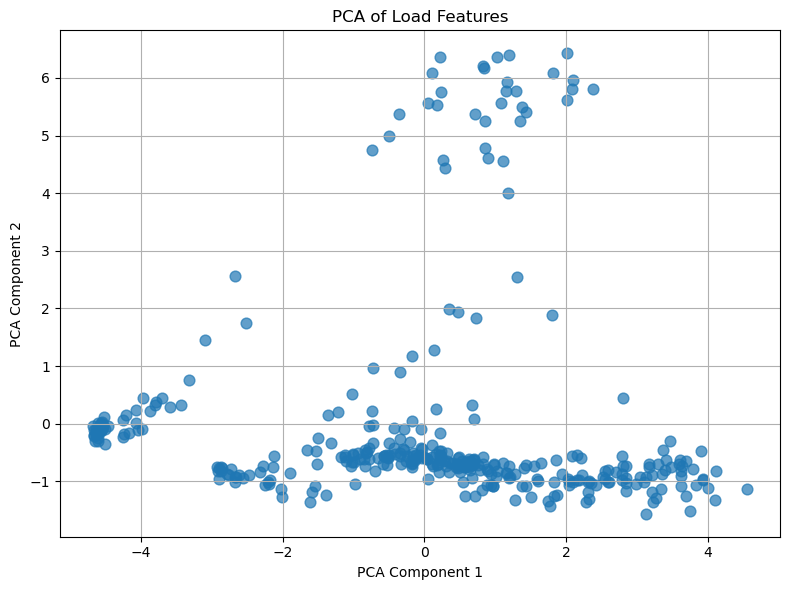

In [24]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Normalize features
X_scaled = StandardScaler().fit_transform(corr_df)

# Run PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Add cluster info if available
cluster_labels = pivot_df['cluster'] if 'cluster' in pivot_df.columns else None

# Plot
plt.figure(figsize=(8, 6))
if cluster_labels is not None:
    sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=cluster_labels, palette="tab10", s=60, alpha=0.7)
    plt.legend(title="Cluster")
else:
    plt.scatter(X_pca[:, 0], X_pca[:, 1], s=60, alpha=0.7)

plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.title("PCA of Load Features")
plt.grid(True)
plt.tight_layout()
plt.show()


In [25]:
# Combine cluster labels with features
if 'cluster' in pivot_df.columns:
    features_with_cluster = corr_df.copy()
    features_with_cluster['cluster'] = pivot_df['cluster']

    for col in corr_df.columns:
        plt.figure(figsize=(6, 4))
        sns.boxplot(x='cluster', y=col, data=features_with_cluster, palette="pastel")
        plt.title(f"{col} by Cluster")
        plt.tight_layout()
        plt.show()


In [26]:
import pandas as pd
df = pd.read_csv("daily_load_with_clusters_and_labels.csv")

# ✅ 确保你有 'date' 和 'cluster' 列
df['date'] = pd.to_datetime(df['date'])

# ✅ 定义 pivot_df（不要跳过这步！）
pivot_df = df.copy()

# 1. 映射 pattern 和 season
pivot_df['pattern'] = pivot_df['cluster'].map(cluster_name_map)
pivot_df['season'] = pivot_df['date'].apply(get_season)

# 2. 列名转为字符串（以免是 datetime.time）
pivot_df.columns = pivot_df.columns.map(str)

# 3. 提取负载列（非 date/cluster/pattern/season）
load_columns = [col for col in pivot_df.columns if col not in ['date', 'cluster', 'pattern', 'season']]

# 4. 提取特征
features_df = pd.DataFrame(index=pivot_df.index)
features_df["total_load"] = pivot_df[load_columns].sum(axis=1)
features_df["peak_load"] = pivot_df[load_columns].max(axis=1)
features_df["valley_load"] = pivot_df[load_columns].min(axis=1)
features_df["load_range"] = features_df["peak_load"] - features_df["valley_load"]
features_df["load_std"] = pivot_df[load_columns].std(axis=1)
features_df["time_of_peak"] = pivot_df[load_columns].idxmax(axis=1)
features_df["time_of_valley"] = pivot_df[load_columns].idxmin(axis=1)

# 5. 取出纯时间部分
features_df["time_of_peak"] = features_df["time_of_peak"].str[-8:]
features_df["time_of_valley"] = features_df["time_of_valley"].str[-8:]

# ✅ 修复 plot，x 轴用日期
plt.figure(figsize=(12, 5))
plt.plot(pivot_df['date'], features_df["total_load"])
plt.title("Total Daily Load Over Time in VHS")
plt.xlabel("Date")
plt.ylabel("kWh")
plt.ylim(0,8000)
plt.grid(True)
plt.show()

NameError: name 'cluster_name_map' is not defined